In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sns

In [ ]:
# Files couldn't be uploaded

#reviews = pd.read_csv("/content/reviews_details.csv")
#listings = pd.read_csv("/content/listings_details.csv", low_memory=False)
#calendar = pd.read_csv("/content/calendar.csv")

In [ ]:
# Upload CSV files from Google Drive since they are too large to be uploaded from hard drive

sheet_url1 = "https://docs.google.com/spreadsheets/d/1SKkXzZ9XHXPnzmr-2ImEPPyy7qMnX2slQNvObsC3mw8/edit?usp=sharing"
url_1 = sheet_url1.replace('/edit?usp=', '/export?format=csv&usp=')

listing = pd.read_csv(url_1)

In [ ]:
listing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,2018-11-28,2.10,1,44
1,3209,"Quiet apt near center, great view",3806,Maartje,NaN,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,2018-08-29,1.03,1,47
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,NaN,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,2018-11-30,2.18,2,198
3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,NaN,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,2018-01-21,0.09,2,141
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.386727,4.892078,Private room,150,2,171,2018-11-25,2.03,1,199


# Checking for Duplicate values in the dataset

In [ ]:
listing.duplicated().values.any()

False

# Checking for null (NA) values present in the dataset


In [ ]:
pd.isnull(listing).any()

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group                True
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [ ]:
def missing_values(data):
    data_na= data.isnull().sum().sort_values(ascending=False)
    data_na_percent = (data.isnull().sum()/len(data)*100).sort_values(ascending=False)
    missing_data = pd.concat([data_na, data_na_percent], axis=1, keys=['Total', 'Percent'])
    return missing_data


In [ ]:
missing_data = missing_values(listing)
missing_data.head(20)

,Total,Percent
neighbourhood_group,20030,100.000000
last_review,2406,12.011982
reviews_per_month,2406,12.011982
name,38,0.189715
host_name,4,0.019970
id,0,0.000000
host_id,0,0.000000
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000


# Removing redundant values

In [ ]:
print(listing["name"].unique())
print(listing["neighbourhood_group"].unique())
print(listing["last_review"].unique())
#print(listing["reviews_per_month"].unique())

['Quiet Garden View Room & Super Fast WiFi'
 'Quiet apt near center, great view'
 '100%Centre-Studio 1 Private Floor/Bathroom' ...
 'Amsterdam Cozy apartment nearby center'
 'Home Sweet Home for a Guest or a Couple'
 "Cosy two bedroom appartment near 'de Pijp'!"]
[nan]
['2018-11-28' '2018-08-29' '2018-11-30' ... '2018-01-12' '2018-02-06'
 '2018-03-14']


#### Since Airbnb listings are based on its ID, We can ignore the null values present in names field. Also columns last_review, reviews_per_month can be ignored as there is no obligation for the customer to write a review.

In [ ]:
listing.drop(['neighbourhood_group'], axis=1, inplace=True)
listing.shape

(20030, 15)

In [ ]:
sheet_url2 = "https://docs.google.com/spreadsheets/d/1OEJT67ucKVGkljEyKmpcLt9ubRZUubye_8S7BLIjPCQ/edit?usp=sharing"
url_2 = sheet_url2.replace('/edit?usp=', '/export?format=csv&usp=')

listings = pd.read_csv(url_2, low_memory=False)

In [ ]:
listings.duplicated().values.any()

False

In [ ]:
listings = listings.fillna(method="ffill")
pd.isnull(listings).any()

id                                  False
listing_url                         False
scrape_id                           False
last_scraped                        False
name                                False
                                    ...  
cancellation_policy                 False
require_guest_profile_picture       False
require_guest_phone_verification    False
calculated_host_listings_count      False
reviews_per_month                   False
Length: 96, dtype: bool

In [ ]:
# Replace string money values into float for listings_details

listings['price'] = listings['price'].apply(lambda x:x.lstrip('$'))
listings['price'] = listings['price'].apply(lambda x:x.replace(',',''))
listings['price'] = listings['price'].astype('float')
listings['cleaning_fee'] = listings['cleaning_fee'].apply(lambda x:x.lstrip('$'))
listings['cleaning_fee'] = listings['cleaning_fee'].astype('float')
listings['extra_people'] = listings['extra_people'].apply(lambda x:x.lstrip('$'))
listings['extra_people'] = listings['extra_people'].astype('float')

In [ ]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20181206172549,2018-12-06,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.10
1,3209,https://www.airbnb.com/rooms/3209,20181206172549,2018-12-06,"Quiet apt near center, great view",You will love our spacious (90 m2) bright apar...,"Our apartment has lots of light, a balcony and...",You will love our spacious (90 m2) bright apar...,none,Welcome to the Spaarndammerbuurt! From the beg...,...,f,NaN,{Amsterdam},f,f,moderate,f,f,1,1.03
2,20168,https://www.airbnb.com/rooms/20168,20181206172549,2018-12-06,100%Centre-Studio 1 Private Floor/Bathroom,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,2.18
3,25428,https://www.airbnb.com/rooms/25428,20181206172549,2018-12-06,Lovely apt in City Centre (Jordaan),"Cozy studio on your own private floor, 100% in...","This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,Located just in between famous central canals....,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,0.09
4,27886,https://www.airbnb.com/rooms/27886,20181206172549,2018-12-06,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.03


In [ ]:
neighbor = listings['neighbourhood'].value_counts().sort_values(ascending=False).head(10)
neighbor

Oud-West           4263
De Pijp            1801
Grachtengordel     1252
Bos en Lommer      1201
Indische Buurt      994
Oosterparkbuurt     951
Jordaan             925
Rivierenbuurt       737
Oost                614
Watergraafsmeer     469
Name: neighbourhood, dtype: int64

# Sorting neighbourhoods by average price

In [ ]:
neighbour_price = listing.groupby('neighbourhood', as_index=False)['price'].mean().sort_values(by = 'price', ascending=False)
neighbour_price

,neighbourhood,price
5,Centrum-West,189.920034
4,Centrum-Oost,189.376301
21,Zuid,171.126995
11,IJburg - Zeeburgereiland,165.157080
16,Oud-Noord,157.684764
8,De Pijp - Rivierenbuurt,157.178500
3,Buitenveldert - Zuidas,153.087786
7,De Baarsjes - Oud-West,143.849218
17,Oud-Oost,143.398596
20,Westerpark,141.004027


# Visual-plotting neighborhoods by highest to lowest average cost(darkest to lightest)



/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

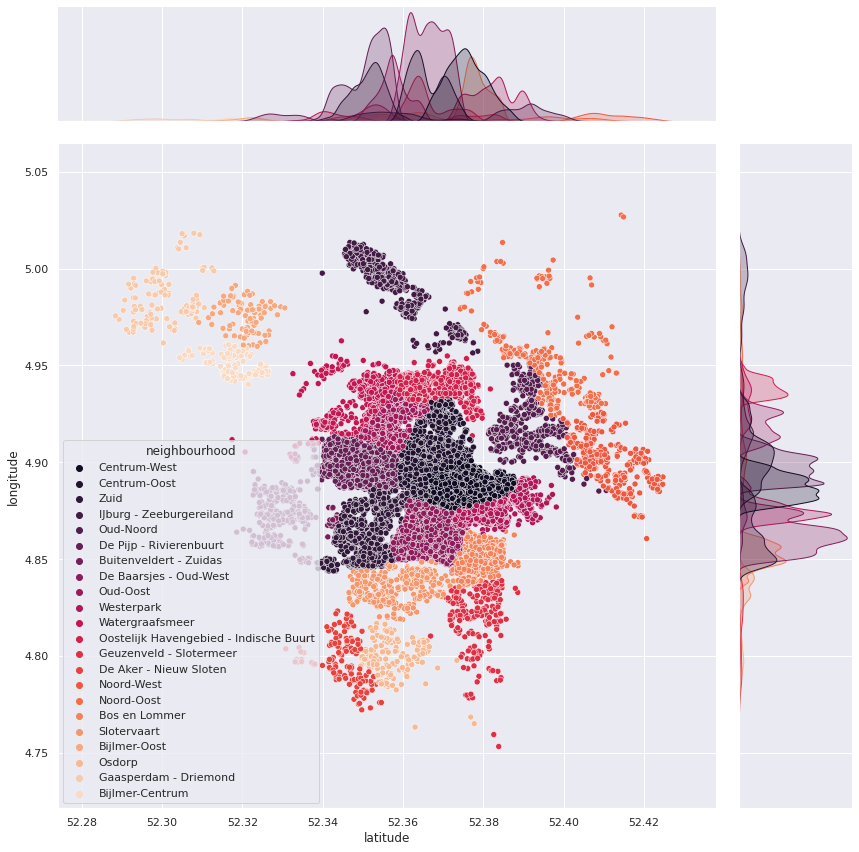

<function seaborn.utils.despine>

In [ ]:
sns.set()

plt.figure(figsize=(10,10))
sns.jointplot(x=listing.latitude, y=listing.longitude, hue=listing.neighbourhood,
              hue_order = neighbour_price.neighbourhood,
              palette=("rocket"), size = 12)

#plt.title('Average Price Distribution per Neighborhood', fontsize=20)
plt.show()
sns.despine

In [ ]:
listings['review_scores_rating'] = listings['review_scores_rating'].astype(int)
listings['review_scores_rating']

0         97
1         96
2         87
3        100
4         99
        ... 
20025    100
20026    100
20027    100
20028    100
20029    100
Name: review_scores_rating, Length: 20030, dtype: int64

# Plotting proportion differences in review scores between verified/unverified hosts

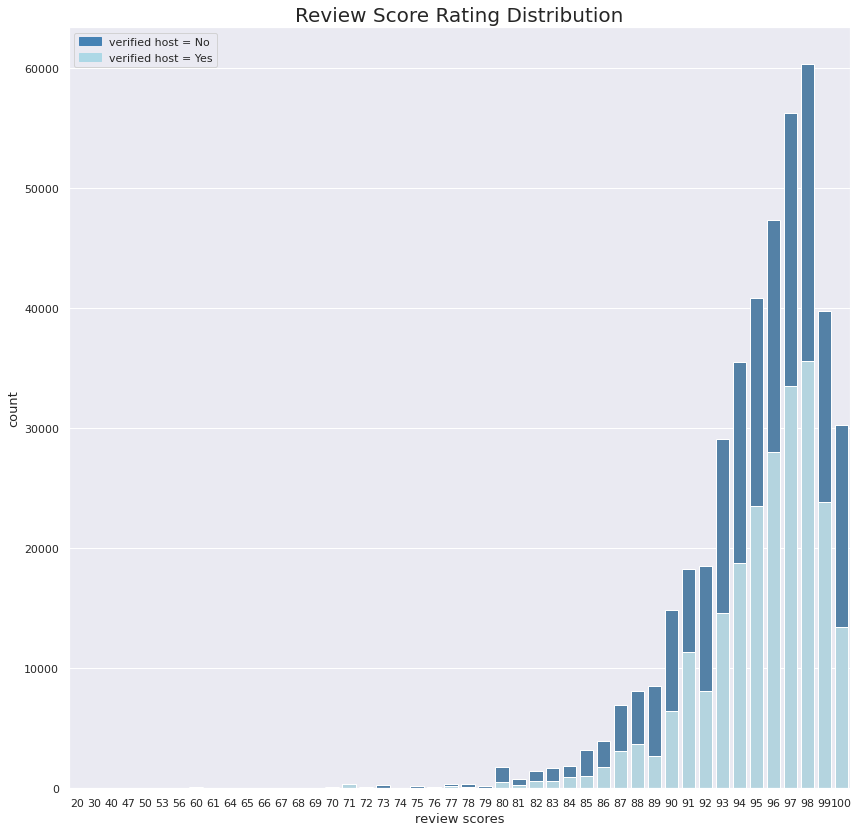

In [ ]:
plt.figure(figsize=(14, 14))

total = listings.groupby('review_scores_rating')['number_of_reviews'].sum().reset_index()
bar1 = sns.barplot(x="review_scores_rating",  y="number_of_reviews", data=total, color='steelblue')

host = listings[listings.host_identity_verified=='f'].groupby('review_scores_rating')['number_of_reviews'].sum().reset_index()
diff = total.number_of_reviews - host.number_of_reviews
bar2 = sns.barplot(x=host.review_scores_rating, y=diff, estimator=sum, ci=None,  color='lightblue')

#legend
top_bar = mpatches.Patch(color='steelblue', label='verified host = No')
bottom_bar = mpatches.Patch(color='lightblue', label='verified host = Yes')
plt.legend(handles=[top_bar, bottom_bar])

plt.title('Review Score Rating Distribution', fontsize=20)
plt.xlabel('review scores', fontsize=13)
plt.ylabel('count', fontsize=13)
plt.show()

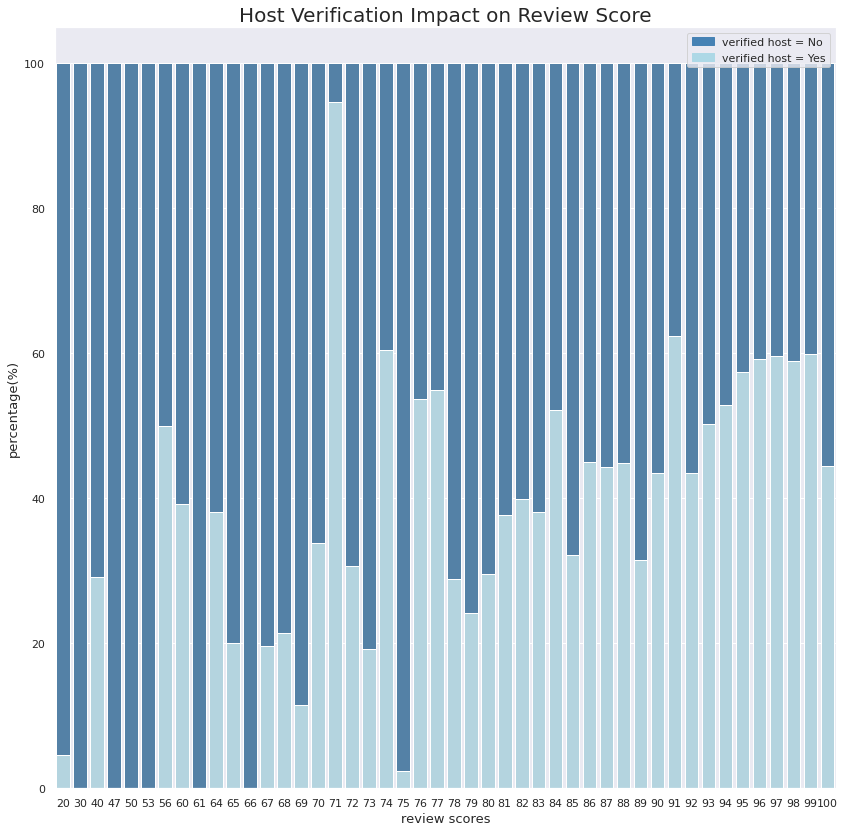

In [ ]:
# Same plot as above, just using percentage

plt.figure(figsize=(14, 14))

total = listings.groupby('review_scores_rating')['number_of_reviews'].sum().reset_index()
host = listings[listings.host_identity_verified=='f'].groupby('review_scores_rating')['number_of_reviews'].sum().reset_index()
host['number_of_reviews'] = [100 - (i / j * 100) for i,j in zip(host['number_of_reviews'], total['number_of_reviews'])]
total['number_of_reviews'] = [i / j * 100 for i,j in zip(total['number_of_reviews'], total['number_of_reviews'])]

bar1 = sns.barplot(x="review_scores_rating",  y="number_of_reviews", data=total, color='steelblue')
bar2 = sns.barplot(x="review_scores_rating", y="number_of_reviews", data=host, estimator=sum, ci=None,  color='lightblue')

#legend
top_bar = mpatches.Patch(color='steelblue', label='verified host = No')
bottom_bar = mpatches.Patch(color='lightblue', label='verified host = Yes')
plt.legend(handles=[top_bar, bottom_bar])

plt.title('Host Verification Impact on Review Score', fontsize=20)
plt.xlabel('review scores', fontsize=13)
plt.ylabel('percentage(%)', fontsize=13)
plt.show()

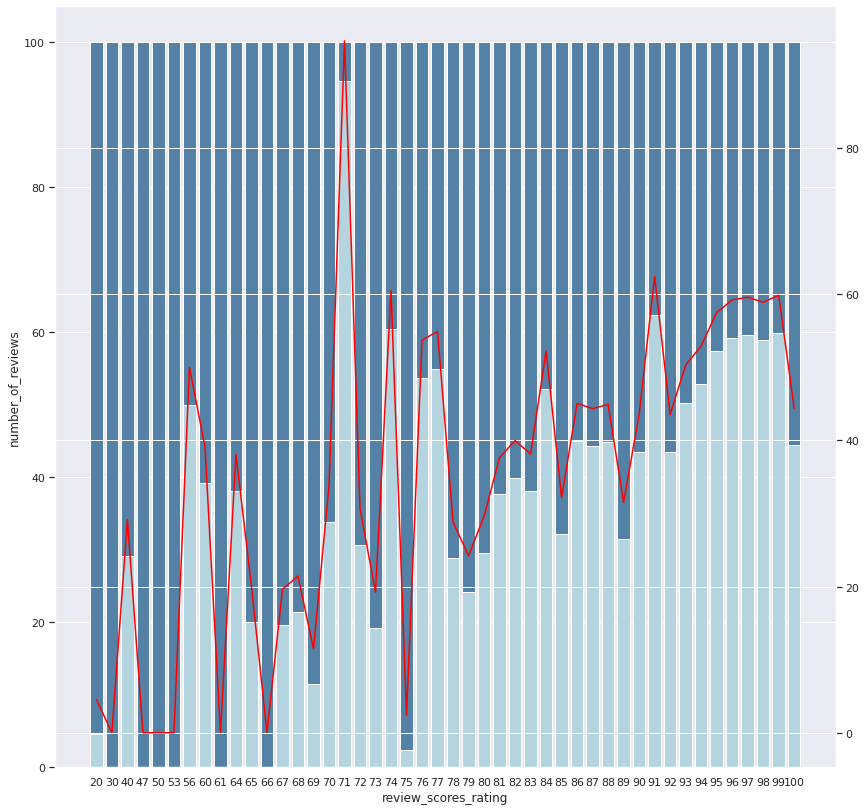

In [ ]:
# Axes issue to be fixed!

plt.figure(figsize=(14, 14))

total = listings.groupby('review_scores_rating')['number_of_reviews'].sum().reset_index()
host = listings[listings.host_identity_verified=='f'].groupby('review_scores_rating')['number_of_reviews'].sum().reset_index()
host['number_of_reviews'] = [100 - (i / j * 100) for i,j in zip(host['number_of_reviews'], total['number_of_reviews'])]
total['number_of_reviews'] = [i / j * 100 for i,j in zip(total['number_of_reviews'], total['number_of_reviews'])]

bar1 = sns.barplot(x="review_scores_rating",  y="number_of_reviews", data=total, color='steelblue')
ax = sns.barplot(x="review_scores_rating", y="number_of_reviews", data=host, estimator=sum, ci=None,  color='lightblue')
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), host.number_of_reviews, color='red')
#reg = sns.stripplot(x="review_scores_rating",  y="number_of_reviews", data=host, color='darkblue')

plt.show()

# Other general plot distributions

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


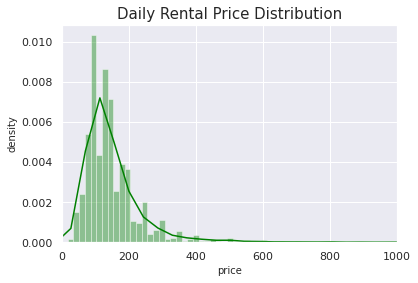

In [ ]:
sns.distplot(listings.price, bins=500, color='Green')
plt.xlim(0,1000)

plt.title('Daily Rental Price Distribution', fontsize=15)
plt.ylabel('density', fontsize=10)
plt.xlabel('price', fontsize=10)
plt.show()

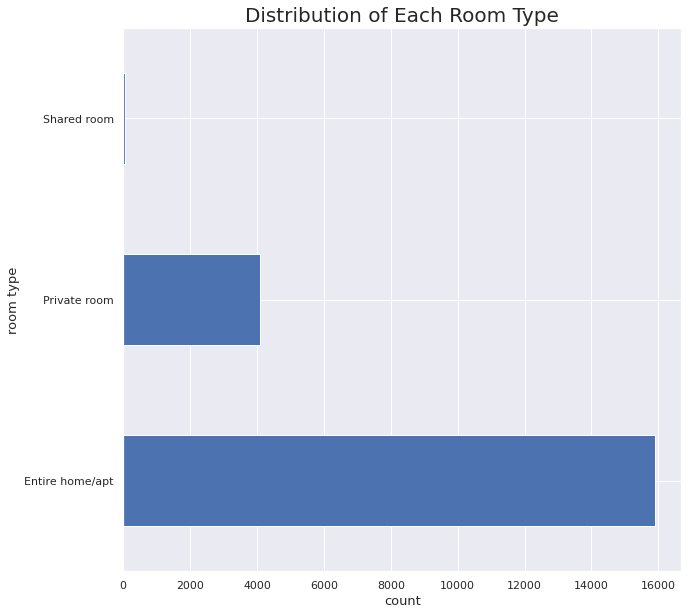

In [ ]:
room = listings['room_type'].value_counts().sort_values(ascending=False)
room.plot.barh(figsize=(10, 10))

plt.title('Distribution of Each Room Type', fontsize=20)
plt.xlabel('count', fontsize=13)
plt.ylabel('room type', fontsize=13)
plt.show()

In [ ]:
price_order = listing.groupby('room_type', as_index=False)['price'].mean().sort_values(by = 'price', ascending=False)
price_order

,room_type,price
0,Entire home/apt,165.779659
1,Private room,100.131501
2,Shared room,92.000000


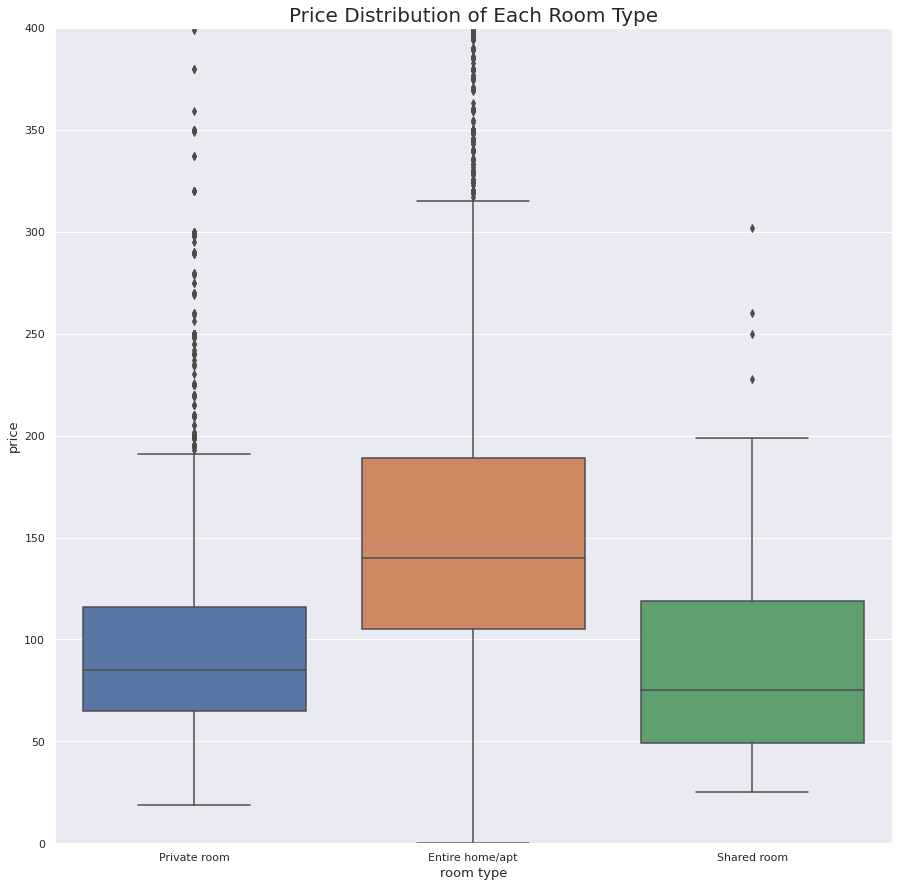

In [ ]:
# Price distribution for each type of room

plt.figure(figsize=(15,15))
plt.ylim(0,400)
sns.boxplot(x='room_type', y='price',data=listing)

plt.title('Price Distribution of Each Room Type', fontsize=20)
plt.xlabel('room type', fontsize=13)
plt.ylabel('price', fontsize=13)
plt.show()

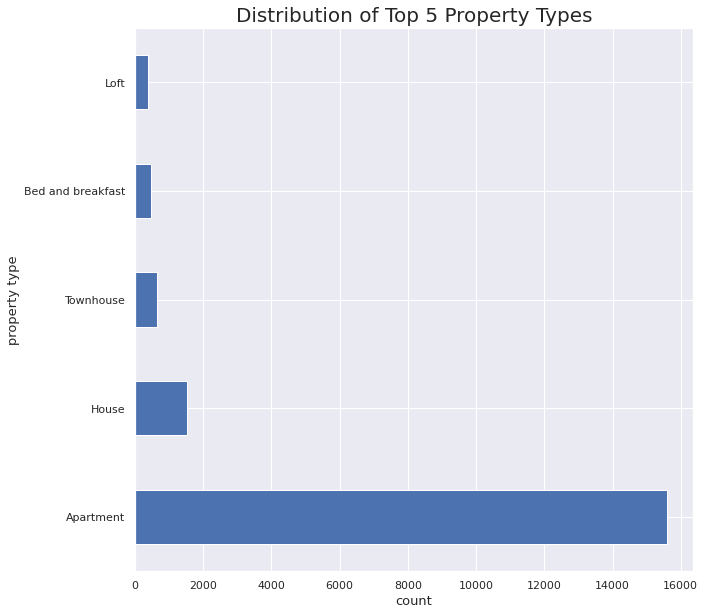

In [ ]:
prop = listings['property_type'].value_counts().sort_values(ascending=False).head(5)
prop.plot.barh(figsize=(10, 10))

plt.title('Distribution of Top 5 Property Types', fontsize=20)
plt.xlabel('count', fontsize=13)
plt.ylabel('property type', fontsize=13)
plt.show()

In [ ]:
#prop_order = listings.groupby('property_type', as_index=False)['price'].mean()
#prop_order = prop_order.loc[prop_order['property_type'].isin(['Apartment', 'House', 'Townhouse', 'Bed and breakfast', 'Loft'])]

In [ ]:
# Price distribution for each type of property
'''
plt.figure(figsize=(15,15))
plt.ylim(0,400)
sns.barplot(x='property_type', y='price', data=prop_order)

plt.title('Price Average of Most Common Property Types', fontsize=20)
plt.xlabel('room type', fontsize=13)
plt.ylabel('price', fontsize=13)
plt.show()
'''

"\nplt.figure(figsize=(15,15))\nplt.ylim(0,400)\nsns.barplot(x='property_type', y='price', data=prop_order)\n\nplt.title('Price Average of Most Common Property Types', fontsize=20)\nplt.xlabel('room type', fontsize=13)\nplt.ylabel('price', fontsize=13)\nplt.show()\n"

In [ ]:
prop_max = listings.loc[listings['property_type'].isin(['Apartment', 'House', 'Townhouse', 'Bed and breakfast', 'Loft'])]

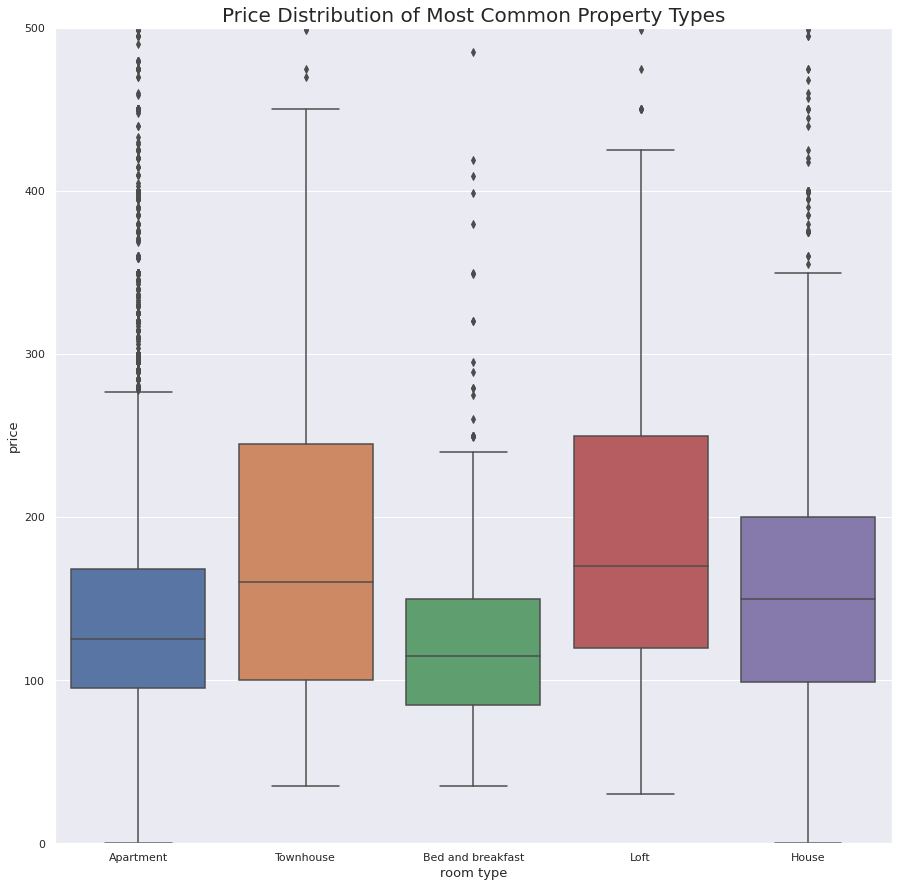

In [ ]:
# Price distribution for each type of room
plt.figure(figsize=(15,15))
plt.ylim(0,500)
sns.boxplot(x='property_type', y='price',data=prop_max)

plt.title('Price Distribution of Most Common Property Types', fontsize=20)
plt.xlabel('room type', fontsize=13)
plt.ylabel('price', fontsize=13)
plt.show()

# Text Mining/Analysis

In [ ]:
# Amenities word selection if there's time
from collections import Counter
Counter(','.join(listings["amenities"]).split()).most_common(20)

[('friendly', 13525),
 ('and', 9511),
 ('dryer",Iron,"Laptop', 8548),
 ('missing:', 8544),
 ('parking', 8368),
 ('monoxide', 7570),
 ('aid', 7455),
 ('detector","Carbon', 7393),
 ('on', 7292),
 ('detector","First', 6811),
 ('greets', 6224),
 ('off', 4829),
 ('or', 4603),
 ('water","Bed', 4582),
 ('silverware","Cooking', 4539),
 ('workspace","Private', 3836),
 ('friendly",Washer,Dryer,"Smoke', 3823),
 ('workspace","translation', 3761),
 ('maker",Refrigerator,Dishwasher,"Dishes', 3604),
 ('en.hosting_amenity_49","translation', 3191)]

In [ ]:
listings['summary'] = listings['summary'].astype(str).str.lower()
#listings.head(3)

In [ ]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

listings['summary']=listings['summary'].apply(regexp.tokenize)
listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20181206172549,2018-12-06,Quiet Garden View Room & Super Fast WiFi,"[quiet, garden, view, room, super, fast, wifi]",I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.10
1,3209,https://www.airbnb.com/rooms/3209,20181206172549,2018-12-06,"Quiet apt near center, great view","[you, will, love, our, spacious, 90, m2, brigh...","Our apartment has lots of light, a balcony and...",You will love our spacious (90 m2) bright apar...,none,Welcome to the Spaarndammerbuurt! From the beg...,...,f,NaN,{Amsterdam},f,f,moderate,f,f,1,1.03
2,20168,https://www.airbnb.com/rooms/20168,20181206172549,2018-12-06,100%Centre-Studio 1 Private Floor/Bathroom,"[cozy, studio, on, your, own, private, floor, ...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,2.18


In [ ]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words("english")
listings['summary'] = listings['summary'].apply(lambda x: [item for item in x if item not in stopwords])
listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20181206172549,2018-12-06,Quiet Garden View Room & Super Fast WiFi,"[quiet, garden, view, room, super, fast, wifi]",I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.10
1,3209,https://www.airbnb.com/rooms/3209,20181206172549,2018-12-06,"Quiet apt near center, great view","[love, spacious, 90, m2, bright, apartment, mo...","Our apartment has lots of light, a balcony and...",You will love our spacious (90 m2) bright apar...,none,Welcome to the Spaarndammerbuurt! From the beg...,...,f,NaN,{Amsterdam},f,f,moderate,f,f,1,1.03
2,20168,https://www.airbnb.com/rooms/20168,20181206172549,2018-12-06,100%Centre-Studio 1 Private Floor/Bathroom,"[cozy, studio, private, floor, 100, lovely, 17...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,2.18


In [ ]:
listings['summary']= listings['summary'].apply(lambda x: ' '.join([item for item in x if len(item)>1]))

In [ ]:
all_words = ' '.join([word for word in listings['summary']])

In [ ]:
import nltk
#nltk.download('punkt')
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [ ]:
from nltk.probability import FreqDist

words_freq = FreqDist(tokenized_words)
words_freq.most_common(25)

[('apartment', 16110),
 ('amsterdam', 15868),
 ('city', 8876),
 ('located', 6953),
 ('room', 6351),
 ('minutes', 5962),
 ('house', 5840),
 ('kitchen', 5460),
 ('restaurants', 5232),
 ('area', 5176),
 ('centre', 5000),
 ('center', 4660),
 ('close', 4456),
 ('spacious', 4434),
 ('nice', 4327),
 ('bedroom', 4179),
 ('walking', 3986),
 ('bathroom', 3960),
 ('quiet', 3895),
 ('walk', 3865),
 ('de', 3839),
 ('living', 3813),
 ('great', 3730),
 ('place', 3727),
 ('floor', 3685)]

In [ ]:
words_top = ' '.join([word for word in listings['summary']])


# Word Cloud of Frequent Words

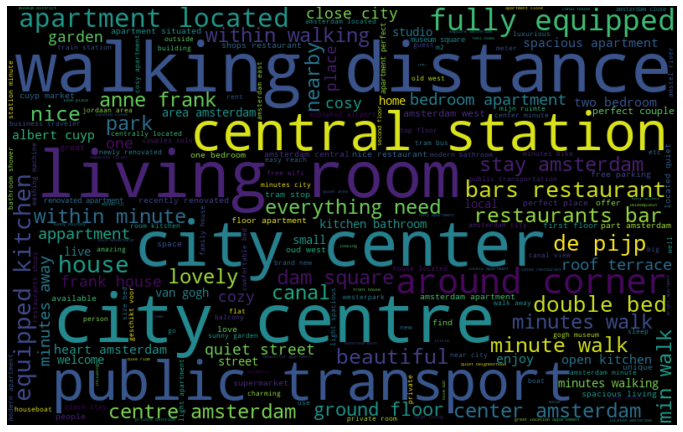

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=1,max_font_size=100).generate(words_top)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');